In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# В данной работе анализируются осноные характеристики и статистика запусков ракет-носителей

# Чтение CSV файла
file_path = 'data.csv'
data = pd.read_csv(file_path, sep=';', decimal=',', skipinitialspace=True)

# Просмотр первых 5 строк данных
print(data.head())

# Основная информация о данных
print(data.info())

# Статистическое описание
print(data.describe())

           Name    LEO   GTO  FullMass              Fuel  Stages  Length  \
0  Falcon-9 1.0   9.00   3,4    318.00  Кислород-Керосин       2    54.9   
1  Falcon-9 1.1  13.15  4,85    506.00  Кислород-Керосин       2    68.4   
2   Falcon-9 FT  22.80   8,3    550.00  Кислород-Керосин       2    70.0   
3      Электрон   0.25  0,15     12.55  Кислород-Керосин       2    17.0   
4         CZ-2C   3.85   1,4    233.00           НДМГ-АТ       2    42.0   

          Country    Class Activity  Design  ActiveYears  StartDate  Launches  \
0             США  Средний      нет  Тандем            3       2010         5   
1             США  Средний      нет  Тандем            3       2013        15   
2             США  Тяжелый       да  Тандем           10       2015       210   
3  Новая Зеландия   Легкий       да  Тандем            8       2017        26   
4           Китай  Средний       да  Тандем           43       1982        82   

   Failures  SuccessRate  LaunchPerYear  
0         1   

In [ ]:
# Анализ исходных данных. Исследуется то, сколько ракет представлено для каждого вида топлива
# страны-производителя, класса, применяемости на сегодняшний день, типа компоновки и количества ступеней
overview_headers = ['Fuel', 'Country', 'Class', 'Activity', 'Stages', 'Design']

Заголовок: Fuel
Fuel
Кислород-Керосин    24
Кислород-Водород    12
ТТ                   9
НДМГ-АТ              5
Метан-Кислород       3
Name: count, dtype: int64

Заголовок: Country
Country
США               22
Китай              7
ЕС                 7
Япония             5
Россия             4
СССР               3
Индия              2
Новая Зеландия     1
Южная Корея        1
Украина            1
Name: count, dtype: int64

Заголовок: Class
Class
Тяжелый    18
Легкий     18
Средний    17
Name: count, dtype: int64

Заголовок: Activity
Activity
да     28
нет    25
Name: count, dtype: int64

Заголовок: Stages
Stages
2    28
3    16
4     7
5     1
1     1
Name: count, dtype: int64

Заголовок: Design
Design
Тандем             41
Комбинированная    10
Пакет               2
Name: count, dtype: int64



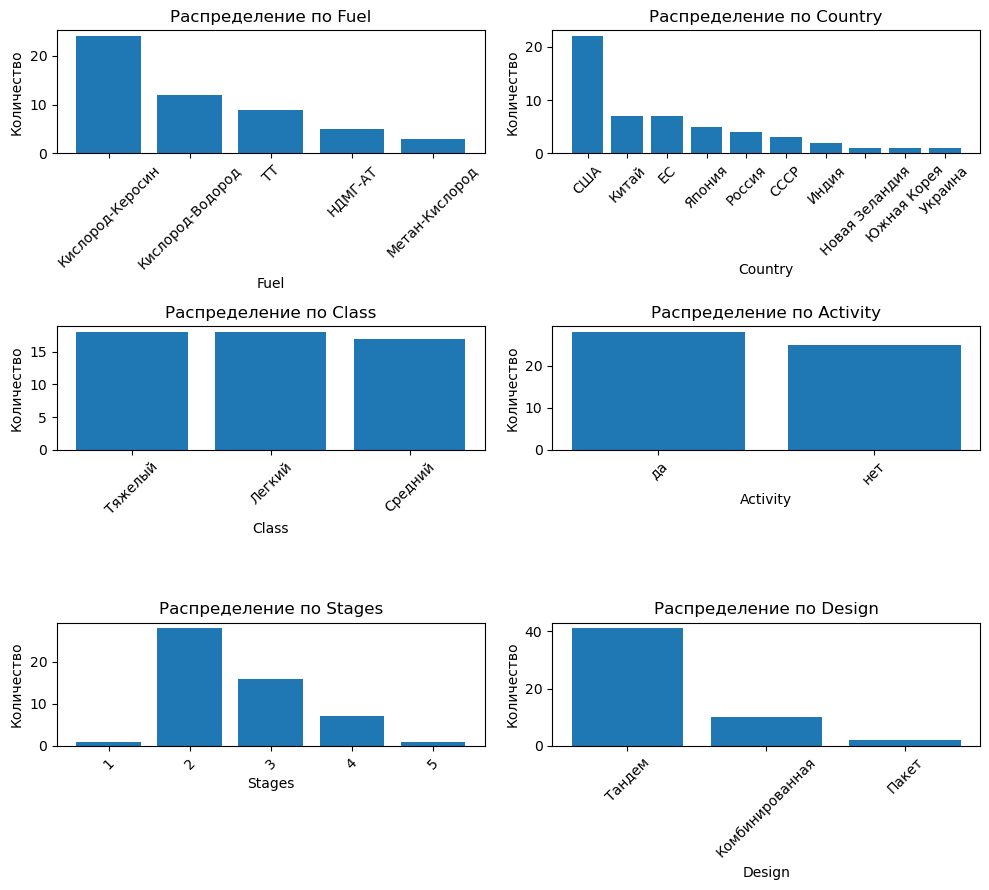

In [28]:
num_headers = len(overview_headers)
num_cols = 2
num_rows = (num_headers + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

axs = axs.flatten()

for i, header in enumerate(overview_headers):
    print(f'Заголовок: {header}')
    unique_values = data[header].value_counts()
    print(unique_values)
    print()

    axs[i].bar(unique_values.index, unique_values.values)
    axs[i].set_title(f'Распределение по {header}')
    axs[i].set_xlabel(header)
    axs[i].set_ylabel('Количество')
    axs[i].tick_params(axis='x', rotation=45)  # Поворот подписей по оси X для читаемости

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

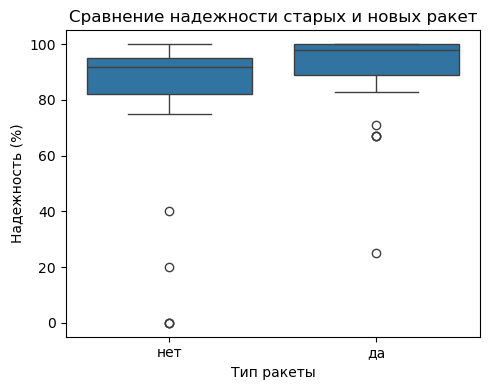

In [17]:
# Сравнение надежности современных ракет с надежностью списанных ракет
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['Activity'], y=data['SuccessRate'], data=data)

plt.title('Сравнение надежности старых и новых ракет')
plt.xlabel('Тип ракеты')
plt.ylabel('Надежность (%)')

plt.tight_layout()
plt.show()

In [29]:
#Диаграммы показывают, что новые ракеты более надежные.

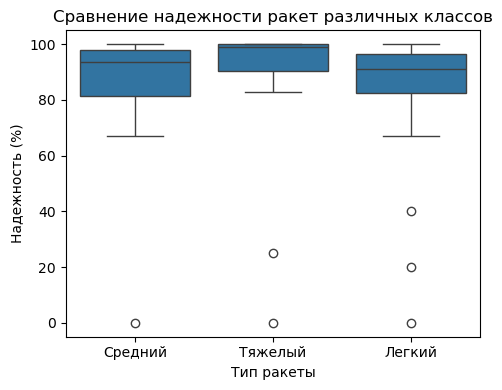

In [ ]:
#Сравнение надежности ракет различных классов
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['Class'], y=data['SuccessRate'], data=data)

plt.title('Сравнение надежности ракет различных классов')
plt.xlabel('Тип ракеты')
plt.ylabel('Надежность (%)')

plt.tight_layout()
plt.show()

In [ ]:
#Диаграммы показывают, что ракеты тяжелого класса по своей надежности обходят ракеты других классов

Коэффициент корреляции между ActiveYears и SuccessRate: 1.00


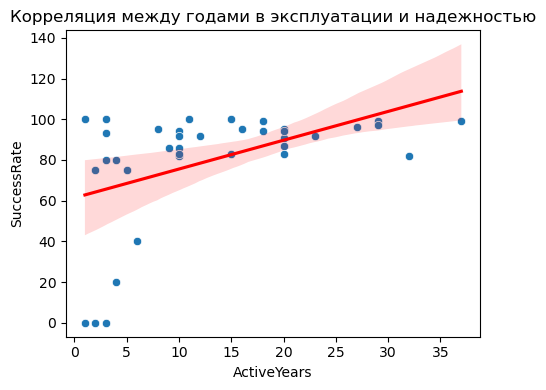

In [ ]:
#Проверочное исследование влияния надежности ракеты на количество запусков
filtered_data = data[data['Activity'] == 'нет']
correlation = filtered_data['SuccessRate'].corr(filtered_data['SuccessRate'])
print(f'Коэффициент корреляции между ActiveYears и SuccessRate: {correlation:.2f}')

plt.figure(figsize=(5, 4))
sns.scatterplot(x='ActiveYears', y='SuccessRate', data=filtered_data)

# Настройка заголовка и меток
plt.title('Корреляция между годами в эксплуатации и надежностью')
plt.xlabel('Активные годы')
plt.ylabel('Надежность')

# Добавление линии регрессии
sns.regplot(x='ActiveYears', y='SuccessRate', data=filtered_data, scatter=False, color='red')

plt.tight_layout()
plt.show()

In [ ]:
#Закономерно то, что надежные ракеты запускают чаще

Коэффициент корреляции между LEO и FullMass: 0.91


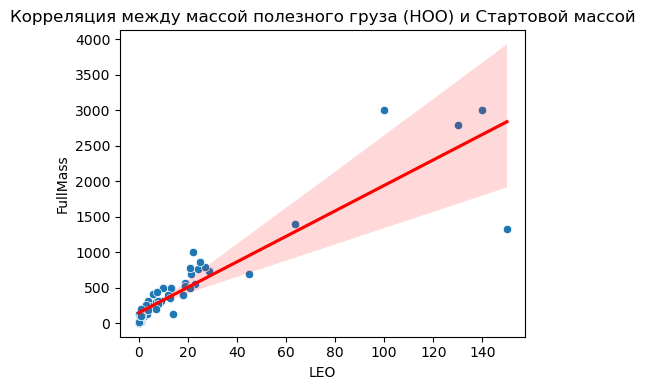

In [ ]:
#Проверочное исследование влияния максимальной массы полезного груза на стартовую массу ракеты
correlation = data['LEO'].corr(data['FullMass'])
print(f'Коэффициент корреляции между LEO и FullMass: {correlation:.2f}')

plt.figure(figsize=(5, 4))
sns.scatterplot(x='LEO', y='FullMass', data=data)

# Настройка заголовка и меток
plt.title('Корреляция между массой полезного груза (НОО) и Стартовой массой')
plt.xlabel('LEO')
plt.ylabel('FullMass')

# Добавление линии регрессии
sns.regplot(x='LEO', y='FullMass', data=data, scatter=False, color='red')

plt.tight_layout()
plt.show()


In [ ]:
#Корреляция обнаружена

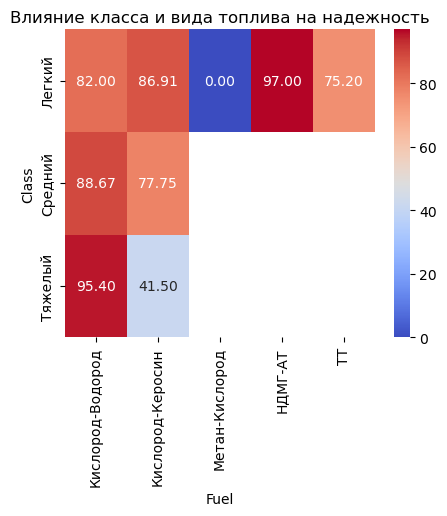

In [ ]:
# Исследование влияния класса и вида топлива на надежность
pivot_table = pd.pivot_table(data=filtered_data, values='SuccessRate', index='Class', columns='Fuel')

plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Влияние класса и вида топлива на надежность')
plt.xlabel('Fuel')
plt.ylabel('Class')
plt.show()

In [ ]:
# В легком сегменте наиболее надежными являются ракеты, использующие пару НДМГ-АТ
# В среднем и тяжелом сегментах наиболее надежными являются ракеты, использующие пару Кислород-Водород

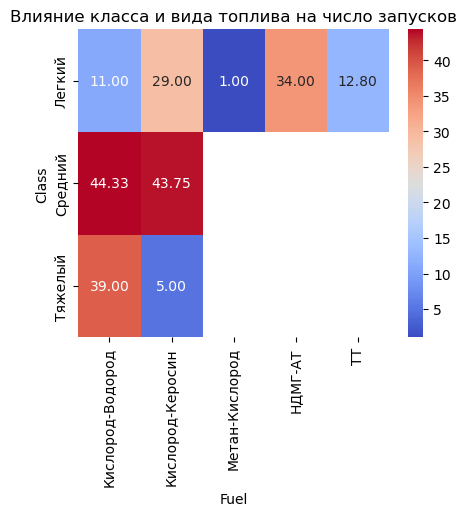

In [ ]:
# Исследование влияния класса и вида топлива на число запусков
pivot_table = pd.pivot_table(data=filtered_data, values='Launches', index='Class', columns='Fuel')

plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Влияние класса и вида топлива на число запусков')
plt.xlabel('Fuel')
plt.ylabel('Class')
plt.show()

In [ ]:
# В легком сегменте наибольшее число запусков имеют ракеты, использующие пару НДМГ-АТ
# В среднем сегменте наибольшее число запусков имеют ракеты, использующие Кислород-Водород и Кислород-Керосин
# В тяжелом сегменте наибольшее число запусков имеют ракеты, использующие Кислород-Водород

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Создание модели оценки массы будущей ракеты, исходя из требований к массе полезного груза

data = data.dropna()
X = data[['LEO']]
y = data['FullMass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

y_test_min = y_test.min()
y_test_max = y_test.max()
accuracy = 1 - (mae / (y_test_max - y_test_min))

print(f'Точность модели: {accuracy:.2f}')

def predict_gto(leo):
    return model.predict([[leo]])[0]

leo = 5
gto = predict_gto(leo)
print(f'Предсказанный FullMass для LEO={leo}: {gto:.2f}')

Точность модели: 0.80
Предсказанный FullMass для LEO=5: 236.12


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Создание модели формирования требований к будущей ракете-носителю
# Исходя из требований к массе полезного груза на низкой-околоземной орбите,
# Можно сформировать требования к геостационарной орбите

data['GTO'] = pd.to_numeric(data['GTO'].str.replace(',', '.'), errors='coerce')
X = data[['LEO']]
y = data['GTO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

y_test_min = y_test.min()
y_test_max = y_test.max()
accuracy = 1 - (mae / (y_test_max - y_test_min))

print(f'Точность модели: {accuracy:.2f}')

def predict_gto(leo):
    return model.predict([[leo]])[0]

leo = 5
gto = predict_gto(leo)
print(f'Предсказанный GTO для LEO={leo}: {gto:.2f}')

Точность модели: 0.95
Предсказанный GTO для LEO=5: 1.86


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
